In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load all simulated datasets based on the python files 'ODmodel_effect_***'
# Some simulations were made in multiple ranges, so here first we reorganize to have one variable with the categories per parameter
categories_maxnb = np.load('out_maxnb_1_15_nrparams_15_categories.npy')
x_maxnbs = np.arange(1,16)

categories_distremovelink=np.zeros((100,30))
categories1 = np.load('out_distremovelink_0_03_nrparams_30_categories.npy')
categories2 = np.load('out_distremovelink_0_03_nrparams_30_categories3.npy')
categories3 = np.load('out_distremovelink_0_03_nrparams_30_categories22.npy')
categories_distremovelink[:,:19]=categories1[:,:19]
categories_distremovelink[:,19]=categories2[:,19]
categories_distremovelink[:,20::]=categories3[:,20::]
x_distremovelinks = np.linspace(0.0,0.3,30)

categories_T = np.load('out_T_01_15_nrparams_30_categories_stabil200.npy')
x_Ts = np.load('out_T_01_15_nrparams_30_Ts_stabil200.npy')
categories10 = np.load('out_T_01_10_nrparams_30_categories_stabil200.npy')
categories_T10 = np.zeros((100,1))
categories_T10[:,0] = categories10[:,-1]

categories_probs = np.load('out_probs_0_02_nrparams_30_2_categories_stabil200.npy')
categories_probs09 = np.load('out_probs_0_02_nrparams_1_09_categories_stabil200.npy')
x_probs=np.load('out_probs_0_02_nrparams_30_probs_stabil200.npy')

categories_distcd=np.zeros((100,30))
categories1 = np.load('out_distcd_0_2_nrparams_30_categories_stabil200.npy')
categories2 = np.load('out_distcd_0_2_nrparams_30_2_categories_stabil200.npy')
categories_distcd[:,:24]=categories1[:,:24]
categories_distcd[:,24::]=categories2[:,:6]
x_distcds = np.load('out_distcd_0_2_nrparams_30_distcds_stabil200.npy')

categories_triesopchange = np.load('out_tries_opinionchange_1_450_nrparams_30_categories_stabil200.npy')
categories_triesopchange1000 = np.load('out_tries_opinionchange_1000_nrparams_30_categories_stabil200.npy')
x_triesopchange = np.load('out_tries_opinionchange_1_450_nrparams_30_tries_opinionchange_stabil200.npy')   

In [7]:
# functions that create the OFAT figures

def plot_catprob(categories,x,title,xticks):
    nrparams=len(x)
    categories[categories==3]=2 #because 3 was misclassified
    
    catprobs=np.zeros((nrparams,3)) #4 categories
    for i in range(3):
        for j in range(nrparams):
            catprobs[j,i]=sum(categories[:,j]==i)/100

    cumcatprobs=np.cumsum(catprobs,axis=1)        
    plt.figure()
    for i in range(3):
        if i==0:
            plt.fill_between(x,np.zeros(nrparams),cumcatprobs[:,i])
        else:
            plt.fill_between(x,cumcatprobs[:,i-1],cumcatprobs[:,i])

    plt.xticks(xticks,fontsize=16)
    plt.yticks([])
    plt.title(title,fontsize=20)
    plt.legend(['A','B','C'],loc=1, prop={'size': 12})
    
def plot_catprob2(categories1,categories2,x1,x2,title,xticks1,xticks2,ax1lim,ax2lim):
    nrparams=len(x1)
    categories1[categories1==3]=2 #because 3 was misclassified
    categories2[categories2==3]=2 #because 3 was misclassified
    
    catprobs=np.zeros((nrparams,3)) 
    catprobs2=np.zeros((1,3))
    for i in range(3):
        for j in range(nrparams):
            catprobs[j,i]=sum(categories1[:,j]==i)/100
        catprobs2[0,i]=sum(categories2[:,0]==i)/100

    cumcatprobs=np.cumsum(catprobs,axis=1)   
    cumcatprobs2=np.cumsum(catprobs2,axis=1)     
    
    legends=['A','B','C']    
    f, (ax, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [15, 1]})
    for i in range(3):
        label=legends[i]
        if i==0:        
            ax.fill_between(x1,np.zeros(nrparams),cumcatprobs[:,i],label=label)
            ax2.fill_between(x2,np.zeros(2),cumcatprobs2[:,i])
        else:
            ax.fill_between(x1,cumcatprobs[:,i-1],cumcatprobs[:,i],label=label)
            ax2.fill_between(x2,cumcatprobs2[:,i-1],cumcatprobs2[:,i])

    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # ax.xaxis.tick_top()
    # ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.yaxis.tick_right()
    ax2.set_xticks([np.mean(x2)])
    ax2.set_xticklabels([xticks2], fontsize=16)
    
    ax.set_xticks(xticks1)
    ax.set_xticklabels(xticks1, fontsize=16)
    ax.set_xlim(ax1lim)
    ax2.set_xlim(ax2lim)
    ax.set_yticks([])

    d = .1  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-d, -d), (d, d)], markersize=6,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([1, 1], [0, 1], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)

    f.subplots_adjust(wspace=0.05)

    ax.set_title(title,fontsize=20)
    ax.legend(loc=2, prop={'size': 12})
    
    

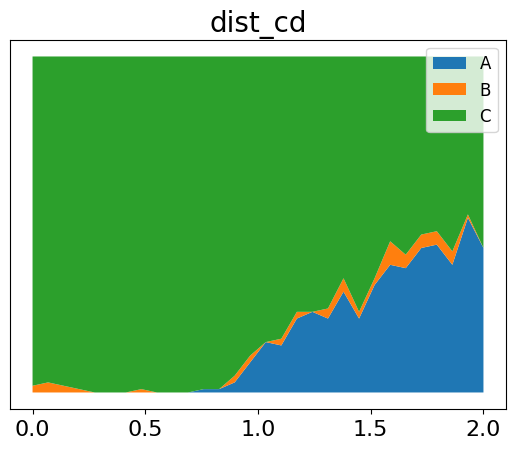

In [ ]:
plot_catprob(categories_distcd,x_distcds,'dist_cd',np.arange(0,2.1,0.5))
plt.savefig('sumfig_cd2', dpi=600)

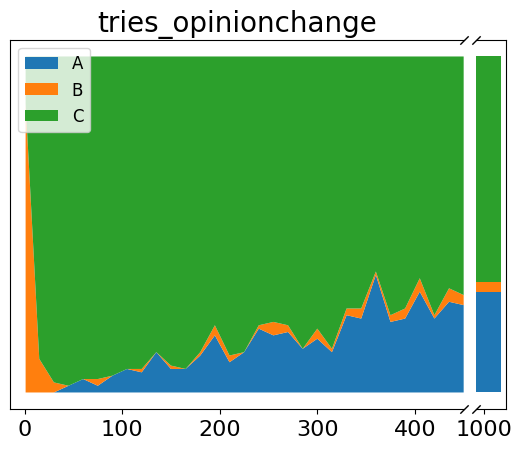

In [5]:
plot_catprob2(categories_triesopchange,categories_triesopchange1000,x_triesopchange,[999,1001],'tries_opinionchange',np.arange(0,450,100),1000,[-15,450],[999.5,1001.3])
plt.savefig('sumfig_triesopchange2', dpi=600)

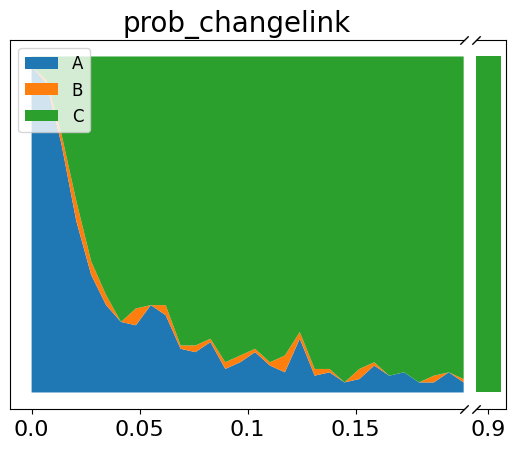

In [6]:
plot_catprob2(categories_probs,categories_probs09,x_probs,[0.895,0.905],'prob_changelink',np.around(np.arange(0,0.2,0.05),decimals=2),0.9,[-0.01,0.2],[0.895,0.907])
plt.savefig('sumfig_probchangelink2', dpi=600)

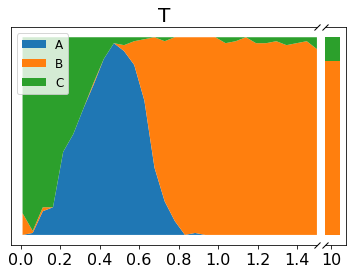

In [8]:
plot_catprob2(categories_T,categories_T10,x_Ts,[9.85,10.15],'T',np.around(np.arange(0,1.5,0.2),decimals=1),10,[-0.05,1.5],[9.9,10.25])
plt.savefig('sumfig_T2', dpi=600)

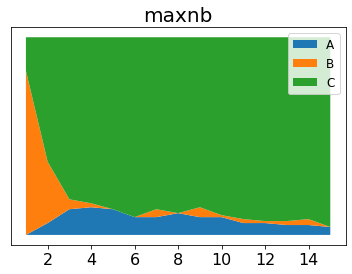

In [9]:
plot_catprob(categories_maxnb,x_maxnbs,'maxnb',np.arange(2,15,2))
plt.savefig('sumfig_maxnb2', dpi=600)

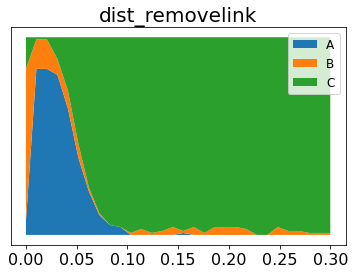

In [10]:
plot_catprob(categories_distremovelink,x_distremovelinks,'dist_removelink',np.arange(0,0.31,0.05))
plt.savefig('sumfig_distremovelink2', dpi=600)